#This is my CE888 Project 2 building a CNN for Image Classification on the FLAME Dataset.

In [2]:
#import libraries 
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input
from keras import models
from tensorflow.keras import Model
from keras import optimizers
from tensorflow.keras.applications import VGG16

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#unzip test file 
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Test.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
#unzip training file 
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Training.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
#set batch size, image size 
batch_size = 32
img_height = 255
img_width = 255
train_dir = '/content/Training'
test_dir = '/content/Test'



In [ ]:
# #from file import test images 
# test_dir = '/content/Test'
# test = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

Found 8617 files belonging to 2 classes.


In [ ]:
# #from file import training images 
# train_dir = '/content/Training'
# train = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

Found 39375 files belonging to 2 classes.


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                              subset='training')

val_gen = val_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                              subset='validation')

test = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        shuffle=True,
                                                        class_mode='binary')

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [ ]:
# #Rescale images between 0-1 for model to aid learning 
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train = train.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3))),
model.add(layers.MaxPooling2D((2,2))),
model.add(layers.Conv2D(32, (3,3), activation='relu')),
model.add(layers.MaxPooling2D((2,2))),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D((2,2))),
model.add(layers.Flatten()),
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 18496)           

In [ ]:
history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=10
)

Epoch 1/10
985/985 [==============================] - 201s 204ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.2502 - val_accuracy: 0.9467
Epoch 2/10
985/985 [==============================] - 201s 204ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 0.1568 - val_accuracy: 0.9575
Epoch 3/10
985/985 [==============================] - 201s 204ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.8042 - val_accuracy: 0.8287
Epoch 4/10
985/985 [==============================] - 201s 204ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.2744 - val_accuracy: 0.9206
Epoch 5/10
985/985 [==============================] - 201s 204ms/step - loss: 0.0155 - accuracy: 0.9939 - val_loss: 0.2109 - val_accuracy: 0.9515
Epoch 6/10
985/985 [==============================] - 200s 203ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.4150 - val_accuracy: 0.9309
Epoch 7/10
985/985 [==============================] - 201s 204ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.6355 -

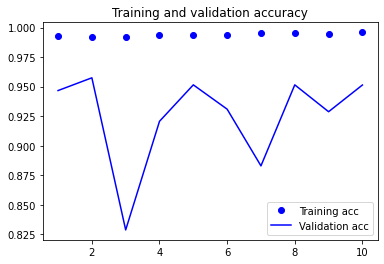

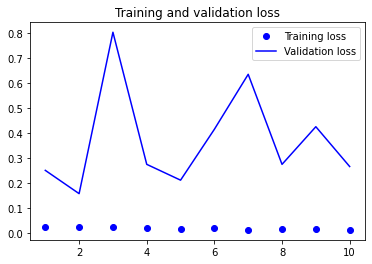

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.ResNet50 = tf.keras.applications.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)


model.ResNet50.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['acc'])

model.ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_18[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
history = model.ResNet50.fit(
  train_gen,
  validation_data=val_gen,
  epochs=10
)

Epoch 1/10
985/985 [==============================] - 278s 277ms/step - loss: 0.2453 - acc: 0.9491 - val_loss: 1.2600 - val_acc: 0.5958
Epoch 2/10
985/985 [==============================] - 273s 277ms/step - loss: 0.0360 - acc: 0.9864 - val_loss: 0.8891 - val_acc: 0.7120
Epoch 3/10
985/985 [==============================] - 274s 278ms/step - loss: 0.0270 - acc: 0.9904 - val_loss: 1.1469 - val_acc: 0.8824
Epoch 4/10
985/985 [==============================] - 270s 274ms/step - loss: 0.0301 - acc: 0.9890 - val_loss: 0.2325 - val_acc: 0.9506
Epoch 5/10
985/985 [==============================] - 271s 275ms/step - loss: 0.0154 - acc: 0.9945 - val_loss: 0.5153 - val_acc: 0.9412
Epoch 6/10
985/985 [==============================] - 269s 273ms/step - loss: 0.0218 - acc: 0.9929 - val_loss: 6.6015 - val_acc: 0.6220
Epoch 7/10
985/985 [==============================] - 270s 274ms/step - loss: 0.0216 - acc: 0.9920 - val_loss: 0.4528 - val_acc: 0.9100
Epoch 8/10
985/985 [============================

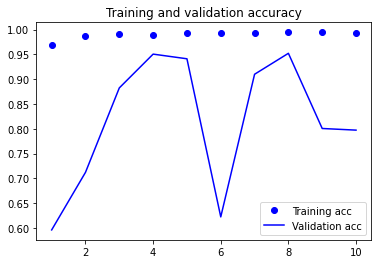

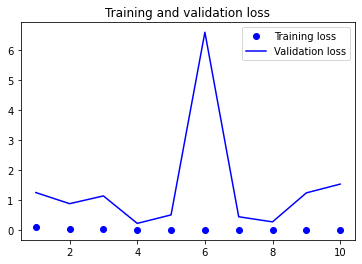

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.ResNet101V2 = tf.keras.applications.ResNet101V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

model.ResNet101V2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.ResNet101V2.fit(
  train_gen,
  validation_data=val_gen,
  epochs=5
)

Epoch 1/5
985/985 [==============================] - 334s 330ms/step - loss: 0.2694 - acc: 0.9440 - val_loss: 0.4119 - val_acc: 0.8647
Epoch 2/5
985/985 [==============================] - 324s 329ms/step - loss: 0.0474 - acc: 0.9830 - val_loss: 64.8515 - val_acc: 0.3439
Epoch 3/5
985/985 [==============================] - 323s 328ms/step - loss: 0.0333 - acc: 0.9883 - val_loss: 0.3383 - val_acc: 0.9161
Epoch 4/5
985/985 [==============================] - 323s 328ms/step - loss: 0.0287 - acc: 0.9908 - val_loss: 9.8355 - val_acc: 0.3646
Epoch 5/5
985/985 [==============================] - 323s 328ms/step - loss: 0.0310 - acc: 0.9901 - val_loss: 1.7284 - val_acc: 0.7541


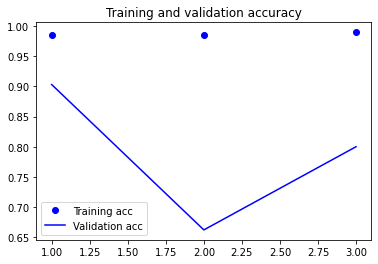

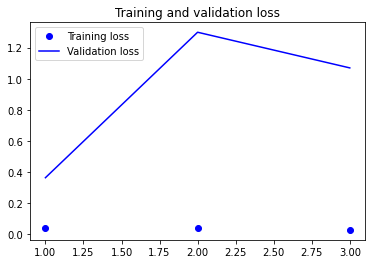

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
train_fire_dir = '/content/Training/Fire'
train_nofire_dir = '/content/Training/No_Fire'


In [11]:
#WONT RUN PROPERLY 


# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=40,
#                                    horizontal_flip=True,
#                                    vertical_flip=True)

# val_datagen = ImageDataGenerator(rescale=1./255)

# x_train_nofire = train_datagen.flow_from_directory(train_nofire_dir,
#                                                     target_size=(150, 150),
#                                                     batch_size=32,
#                                                     shuffle=True,
#                                                     class_mode='categorical'
#                                                     )

# y_train_fire = val_datagen.flow_from_directory(train_fire_dir,
#                                                     target_size=(150, 150),
#                                                     batch_size=32,
#                                                     shuffle=True,
#                                                     class_mode='categorical'
#                                                     )






Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [11]:
IMG_SIZE = 224
LR = 1e-4
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [12]:
model_vgg16 = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")

model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
last_layer = model_vgg16.get_layer('fc2').output
out = Dense(1, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
model_vgg16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['acc'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_resize = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                              subset='training')

val_resize = val_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                              subset='validation')

test_resize = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        shuffle=True,
                                                        class_mode='binary')

Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [21]:
history = model_vgg16.fit(train_resize,
                               batch_size=10,
                               epochs=10, 
                               validation_data=val_resize,
                               callbacks=my_callbacks)

Epoch 1/10
985/985 [==============================] - 361s 348ms/step - loss: 0.2900 - acc: 0.9127 - val_loss: 0.1088 - val_acc: 0.9630
Epoch 2/10
985/985 [==============================] - 343s 348ms/step - loss: 0.1055 - acc: 0.9614 - val_loss: 0.0438 - val_acc: 0.9865
Epoch 3/10
985/985 [==============================] - 340s 345ms/step - loss: 0.0841 - acc: 0.9696 - val_loss: 0.0140 - val_acc: 0.9970
Epoch 4/10
985/985 [==============================] - 341s 346ms/step - loss: 0.0811 - acc: 0.9696 - val_loss: 0.0141 - val_acc: 0.9968
Epoch 5/10
985/985 [==============================] - 341s 346ms/step - loss: 0.0708 - acc: 0.9750 - val_loss: 0.0118 - val_acc: 0.9968
Epoch 6/10
985/985 [==============================] - 342s 347ms/step - loss: 0.0689 - acc: 0.9748 - val_loss: 0.0254 - val_acc: 0.9934
Epoch 7/10
985/985 [==============================] - 342s 347ms/step - loss: 0.0619 - acc: 0.9767 - val_loss: 0.0237 - val_acc: 0.9938
Epoch 8/10
985/985 [============================

In [20]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model_vgg16.predict(test_resize)
ypred = predictions > 0.5
test_acc = accuracy_score(test_resize, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

# precision, recall, f1score, _ = precision_recall_fscore_support(, ypred, average='binary')

# auc = roc_auc_score(test_resize, ypred)

# print("Train Accuracy:\t", acc[-1])
# print("Val Accuracy:\t", val_acc[-1])
# print("Test Accuracy:\t", test_acc)
# print("Precision:\t", precision)
# print("Recall:\t\t", recall)
# print("F1 Score:\t", f1score)
# print("AUC:\t\t", auc)

ValueError: ignored

In [ ]:
np.array(test_resize)